In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1.通过pandas包读入cmd_CalculationData.csv


In [2]:
data = pd.read_csv('scmd_CalculationData.csv')
data.head()

,Name,TimeDate,power,baro,windspeed1,windspeed2,winddirection,temp,power_max,power_min,...,grid_std,fault_max,fault_min,fault_std,windcha,tlqd,K_temp,md,v3,cp
0,1,2016/11/9 13:00,-21.27,997.63,2.81,2.76,226.59,-0.51,43.45,-41.42,...,0.5,0,0,0,0.05,0.295374,272.64,1.274742,22.188041,-0.001380
1,1,2016/11/9 11:10,-38.70,999.04,3.01,2.97,209.90,-2.11,-19.73,-51.16,...,0.4,0,0,0,0.04,0.209302,271.04,1.284080,27.270901,-0.002028
2,1,2016/11/9 12:10,-38.05,998.46,3.14,3.10,243.00,-1.40,-11.24,-49.90,...,0.5,0,0,0,0.04,0.168790,271.75,1.279981,30.959144,-0.001762
3,1,2016/11/9 11:50,-30.16,998.61,3.19,3.12,218.40,-1.65,30.88,-48.64,...,0.5,0,0,0,0.07,0.197492,271.50,1.281352,32.461759,-0.001331
4,1,2016/11/9 13:20,-27.64,997.26,3.30,3.27,227.41,-0.52,170.75,-48.33,...,0.4,0,0,0,0.03,0.206061,272.63,1.274316,35.937000,-0.001108


### 从中取出winddirection和windspeed1这2个字段，绘制风速与风向的散点图（风向为横轴，风速为y轴）。
#### 要求：有标题(风速与风向的函数)、横纵坐标的标题、设置网格，保存图片文件命名为1风速与风向的函数.png

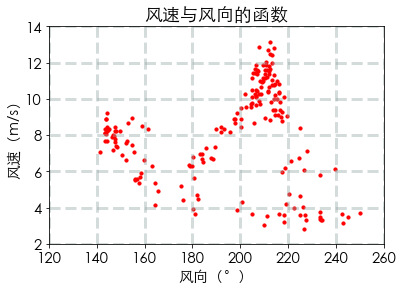

In [3]:
wd = data['winddirection']
ws = data['windspeed1']
plt.rc('font', family='STXihei', size=15)
plt.scatter(wd,ws,c='r',s=10)
# 标题：风速与风向的函数
plt.title('风速与风向的函数')
plt.axis([120,260,2,14])
# 横纵坐标标题
plt.xlabel('风向（°）')
plt.ylabel('风速（m/s）')
# 设置网格
plt.grid(color='#95a5a6',linestyle='--', linewidth=3,axis='both',alpha=0.4)
# 保存文件：1风速与风向的函数.png
plt.savefig('1风速与风向的函数.png')
# 展示图片
plt.show()

## 2.通过pandas包将数据scmd_CalculationData.csv读入

### 从中取出windspeed1、power_max、power_min、power和power_dev这5个字段，绘制功率特性的散点图（风速为x轴，其他为y轴）。
#### 要求：
##### 有标题(功率特性散点图)
##### 横纵坐标的标题、图例、设置网格
##### 保存图片文件命名为2功率特性散点图.png

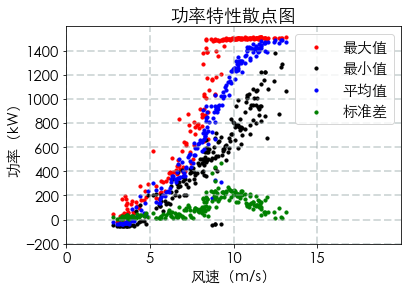

In [4]:
ws = data['windspeed1']
pmax = data['power_max']
pmin = data['power_min']
power = data['power']
pdev = data['power_dev']

plt.rc('font', family='STXihei', size=15)
plt.scatter(ws,pmax,s=10,c='red',label='最大值')
plt.scatter(ws,pmin,s=10,c='black',label='最小值')
plt.scatter(ws,power,s=10,c='blue',label='平均值')
plt.scatter(ws,pdev,s=10,c='green',label='标准差')
# 设置图例
plt.legend()
# 标题：功率特性散点图
plt.title('功率特性散点图')
plt.axis([0,20,-200,1600])
plt.xticks(np.arange(0,20,5))
plt.yticks(np.arange(-200,1600,200))
# 横纵坐标标题
plt.xlabel('风速（m/s）')
plt.ylabel('功率（kW）')
# 设置网格
plt.grid(color='#95a5a6',linestyle='--',linewidth=2,axis='both',alpha=0.4)
# 保存图片文件命名为2功率特性散点图.png
plt.savefig('2功率特性散点图.png')
# 展示图片
plt.show()

## 3.通过pandas包将数据bz_df_wt.csv读入

In [5]:
bz_data = pd.read_csv('bz_df_wt.csv')
bz_data.head()

,binNum,bin_bz_cp,bin_bz_fs,bin_bz_power,bin_bz_size
0,0,0.0,0.0,0.0,0.0
1,1,0.0,0.5,0.0,0.0
2,2,0.0,1.0,0.0,0.0
3,3,0.0,1.5,0.0,0.0
4,4,0.0,2.0,0.0,0.0


### 从中取出bin_bz_fs<=20的数据，然后取出实际风速bin_bz_fs和实际功率bin_bz_power；

In [6]:
temp = bz_data[bz_data['bin_bz_fs'] <= 20]
fs = temp['bin_bz_fs']
power = temp['bin_bz_power']
temp.head()

,binNum,bin_bz_cp,bin_bz_fs,bin_bz_power,bin_bz_size
0,0,0.0,0.0,0.0,0.0
1,1,0.0,0.5,0.0,0.0
2,2,0.0,1.0,0.0,0.0
3,3,0.0,1.5,0.0,0.0
4,4,0.0,2.0,0.0,0.0


### 再读入bzglqx.csv取出保证风速fs和保证功率gl，

In [7]:
bzg_data = pd.read_csv('bzglqx.csv',header=None,names=['fs','gl'])
bzg_data.head()

,fs,gl
0,0.0,0.0
1,0.5,0.0
2,1.0,0.0
3,1.5,0.0
4,2.0,0.0


### 绘制功率曲线的对比图（一张图中绘制，横轴为风速，纵轴为功率）。

#### 要求：
##### 有标题(实测与设计功率曲线对比)
##### 横纵坐标的标题，图例，设置网格
###### 保存图片文件命名为3实测与设计功率曲线对比.png

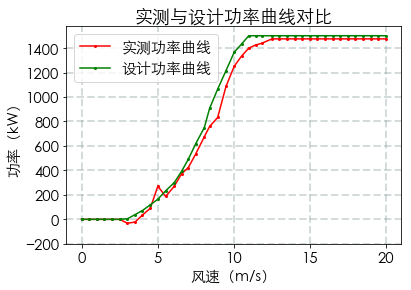

In [8]:
plt.rc('font', family='STXihei', size=15)
plt.plot(fs,power,'ro-',label='实测功率曲线',ms=2)
plt.plot(fs,bzg_data['gl'],'go-',label='设计功率曲线',ms=2)
plt.yticks(np.arange(-200,1600,200))
# 标题：实测与设计功率曲线对比
plt.title('实测与设计功率曲线对比')
# 横纵坐标标题
plt.xlabel('风速（m/s）')
plt.ylabel('功率（kW）')
# 图例
plt.legend()
# 设置网格
plt.grid(color='#95a5a6',linestyle='--',linewidth=2,axis='both',alpha=0.4)
plt.savefig('3实测与设计功率曲线对比.png')
plt.show()